**Brian Blaylock**  
**August 18, 2020**

# Example: Get station time series data from Syoptic API

To get time series data, use the `stations_timeseries` function.

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import sys

# Need to tell Python where to find `get_Synoptic.py`. 
# This says to look back one directory (relative to this notebook).
sys.path.append('../')  

from get_Synoptic import stations_timeseries

In [2]:
# To keep things tidy, put the function params in the params variable
params = dict(
    stid='WBB',
    vars=['air_temp', 'dew_point_temperature'],
    start=datetime(2020, 8, 15),
    end=datetime(2020, 8, 18)
)

a = stations_timeseries(verbose='HIDE', **params)

a


 🚚💨 Speedy Delivery from Synoptic API [timeseries]: https://api.synopticdata.com/v2/stations/timeseries?stid=WBB&vars=air_temp,dew_point_temperature&start=202008150000&end=202008180000&token=🙈HIDDEN



,air_temp,dew_point_temperature
date_time,,
2020-08-15 00:00:00+00:00,30.661,-0.63
2020-08-15 00:01:00+00:00,30.661,-0.80
2020-08-15 00:02:00+00:00,30.600,-0.80
2020-08-15 00:03:00+00:00,30.650,-0.45
2020-08-15 00:04:00+00:00,30.811,-0.55
...,...,...
2020-08-17 23:56:00+00:00,35.822,2.45
2020-08-17 23:57:00+00:00,35.928,2.67
2020-08-17 23:58:00+00:00,35.928,2.44


## Plot the raw data

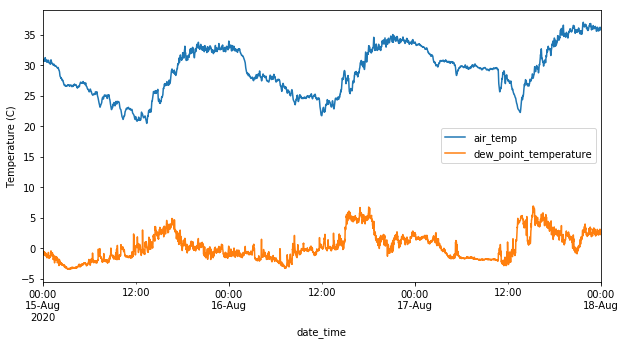

In [3]:
a.plot(figsize=[10,5], ylabel=f"Temperature ({a.attrs['UNITS']['air_temp'][0]})")

## Resample the data to hourly mean

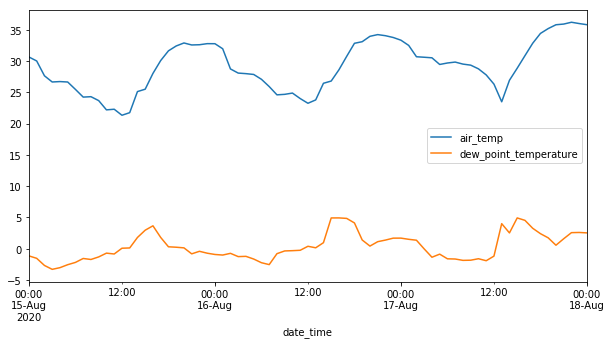

In [4]:
a.resample('1H').mean().plot(figsize=[10,5])

## More than a time series
You might notice, there are a lot of details about the station and data in the DataFrame *attributes*...

In [5]:
a.attrs

{'STATUS': 'ACTIVE',
 'MNET_ID': 153,
 'PERIOD_OF_RECORD': {'start': '1997-01-01T00:00:00Z',
  'end': '2020-08-13T22:15:00Z'},
 'ELEVATION': 4806,
 'NAME': 'U of U William Browning Building',
 'STID': 'WBB',
 'ELEV_DEM': 4727.7,
 'STATE': 'UT',
 'RESTRICTED': False,
 'QC_FLAGGED': False,
 'TIMEZONE': 'America/Denver',
 'ID': 1,
 'RENAMED': {'air_temp_set_1': 'air_temp',
  'dew_point_temperature_set_1d': 'dew_point_temperature'},
 'latitude': 40.76623,
 'longitude': -111.84755,
 'UNITS': {'position': 'ft',
  'dew_point_temperature': 'Celsius',
  'elevation': 'ft',
  'air_temp': 'Celsius'},
 'QC_SUMMARY': {'QC_CHECKS_APPLIED': ['sl_range_check'],
  'TOTAL_OBSERVATIONS_FLAGGED': 0.0,
  'PERCENT_OF_TOTAL_OBSERVATIONS_FLAGGED': 0.0},
 'SUMMARY': {'DATA_QUERY_TIME': '20.4010009766 ms',
  'RESPONSE_CODE': 1,
  'RESPONSE_MESSAGE': 'OK',
  'METADATA_RESPONSE_TIME': '175.655126572 ms',
  'DATA_PARSING_TIME': '79.304933548 ms',
  'TOTAL_DATA_TIME': '99.7068881989 ms',
  'NUMBER_OF_OBJECTS': 1,
  

## When more than one station is returned
If more than one station is returned (e.g., multiple station IDs, radius search, etc.), then the function returns a list of DataFrames, one for each station.

In [6]:
b = stations_timeseries(stid=['WBB', 'KMRY'], vars='air_temp', recent=600, verbose="HIDE")


 🚚💨 Speedy Delivery from Synoptic API [timeseries]: https://api.synopticdata.com/v2/stations/timeseries?stid=WBB,KMRY&vars=air_temp&recent=600&token=🙈HIDDEN

Returned [2] stations. ['WBB', 'KMRY']


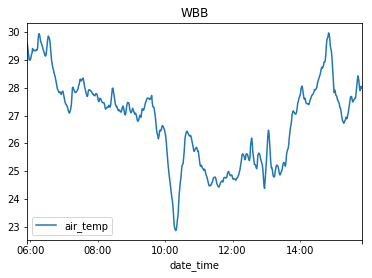

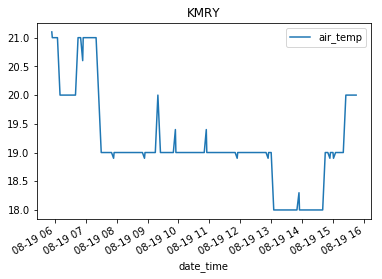

In [7]:
b[0].plot(title=b[0].attrs['STID'])
b[1].plot(title=b[1].attrs['STID'])